In [1]:
import torch
from torch import optim
import optuna
from pathlib import Path
import joblib
from tqdm.notebook import trange, tqdm
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import isnan

from Tensho_InfoVAE.util import make_dataset, IMG_SIDE_LENGTH
from Tensho_InfoVAE.config import setup, save, load
from Tensho_InfoVAE import config
from Tensho_InfoVAE.util import show_samples_in_grid, scatter_3d, generate_labelled_samples


In [2]:
train_data, valid_data, test_data = make_dataset()
model = setup()
#load(f"{config.get('hidden_dims')}.pth", model)

train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=config.get("train_batch_size"), shuffle=True
)
valid_loader = torch.utils.data.DataLoader(
    valid_data, batch_size=config.get("val_batch_size"), shuffle=True
)
test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=config.get("test_batch_size"), shuffle=True
)

optimizer = optim.Adam(
    model.parameters(),
    lr=config.get("learning_rate"),
    weight_decay=config.get("weight_decay"),
)

device_name = "cpu"
if config.get("usecuda"):
    device = torch.device(config.get("idgpu"))
    device_name = "cuda"
if config.get("usemps"):
    device = torch.device("mps")
    device_name = "mps" 

Shape history:
0 initial: (1, 64, 64) = 4096
1 Conv2d: (16, 32, 32) = 16384
2 Conv2d: (32, 16, 16) = 8192
3 Conv2d: (128, 8, 8) = 8192
4 Conv2d: (128, 4, 4) = 2048
5 Conv2d: (128, 2, 2) = 512
6 Flatten: (512, 1, 1) = 512
7 Linear: (512, 1, 1) = 512
8 Linear: (128, 1, 1) = 128
9 Linear: (32, 1, 1) = 32
10 Linear: (8, 1, 1) = 8
11 Linear: (3, 1, 1) = 3
12 Linear: (8, 1, 1) = 8
13 Linear: (32, 1, 1) = 32
14 Linear: (128, 1, 1) = 128
15 Linear: (512, 1, 1) = 512
16 Linear: (512, 1, 1) = 512
17 reshape: (128, 2, 2) = 512
18 ConvTranspose2d: (128, 4, 4) = 2048
19 ConvTranspose2d: (128, 8, 8) = 8192
20 ConvTranspose2d: (32, 16, 16) = 8192
21 ConvTranspose2d: (16, 32, 32) = 16384
22 ConvTranspose2d: (16, 64, 64) = 65536
23 Conv2d: (1, 64, 64) = 4096


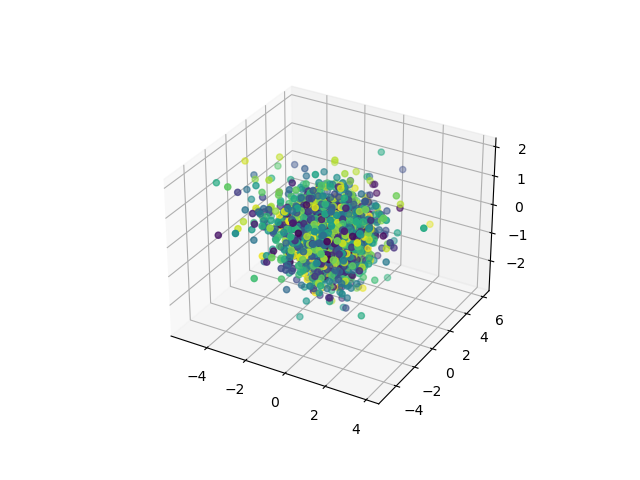

In [3]:
%matplotlib widget
z, label = generate_labelled_samples(model, test_loader)
scatter_3d(z, label)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

epoch:   0  loss   0.2580 recon  0.24102 mmd  0.01699
epoch:   0  loss   0.1102 recon  0.10008 mmd  0.01014
epoch:   0  loss   0.0960 recon  0.09064 mmd  0.00537
epoch:   0  loss   0.0895 recon  0.08667 mmd  0.00286


  0%|          | 0/20 [00:00<?, ?it/s]

Validation loss: 0.08601 (ideal:  0.08787)


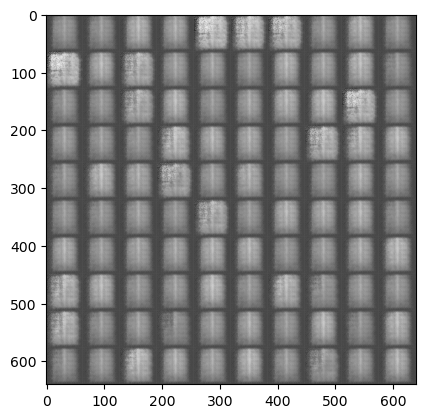

  0%|          | 0/75 [00:00<?, ?it/s]

epoch:   1  loss   0.0909 recon  0.08446 mmd  0.00648
epoch:   1  loss   0.0930 recon  0.08936 mmd  0.00363
epoch:   1  loss   0.0896 recon  0.08698 mmd  0.00258
epoch:   1  loss   0.0899 recon  0.08840 mmd  0.00153


  0%|          | 0/75 [00:00<?, ?it/s]

epoch:   2  loss   0.0881 recon  0.08659 mmd  0.00149
epoch:   2  loss   0.0824 recon  0.08054 mmd  0.00190
epoch:   2  loss   0.0831 recon  0.08221 mmd  0.00088
epoch:   2  loss   0.0860 recon  0.08320 mmd  0.00275


  0%|          | 0/75 [00:00<?, ?it/s]

epoch:   3  loss   0.0852 recon  0.08234 mmd  0.00287
epoch:   3  loss   0.0881 recon  0.08647 mmd  0.00164
epoch:   3  loss   0.0837 recon  0.08279 mmd  0.00086
epoch:   3  loss   0.0861 recon  0.08459 mmd  0.00152


  0%|          | 0/20 [00:00<?, ?it/s]

Validation loss: 0.08346 (ideal:  0.08665)


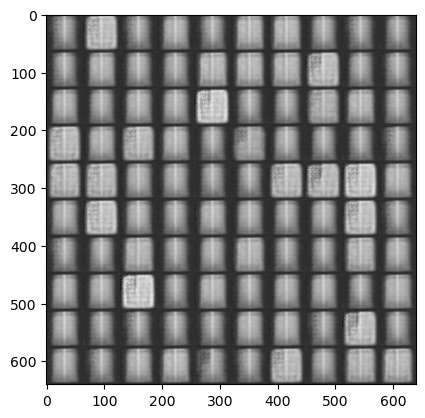

  0%|          | 0/75 [00:00<?, ?it/s]

epoch:   4  loss   0.0879 recon  0.08680 mmd  0.00106
epoch:   4  loss   0.0844 recon  0.08364 mmd  0.00077
epoch:   4  loss   0.0829 recon  0.08216 mmd  0.00074
epoch:   4  loss   0.0840 recon  0.08341 mmd  0.00064


  0%|          | 0/75 [00:00<?, ?it/s]

epoch:   5  loss   0.0869 recon  0.08514 mmd  0.00174
epoch:   5  loss   0.0836 recon  0.08287 mmd  0.00078
epoch:   5  loss   0.0855 recon  0.08396 mmd  0.00156
epoch:   5  loss   0.0852 recon  0.08458 mmd  0.00066


  0%|          | 0/75 [00:00<?, ?it/s]

epoch:   6  loss   0.0846 recon  0.08404 mmd  0.00053
epoch:   6  loss   0.0844 recon  0.08333 mmd  0.00111
epoch:   6  loss   0.0850 recon  0.08444 mmd  0.00052
epoch:   6  loss   0.0860 recon  0.08312 mmd  0.00288


  0%|          | 0/20 [00:00<?, ?it/s]

Validation loss: 0.08247 (ideal:  0.08542)


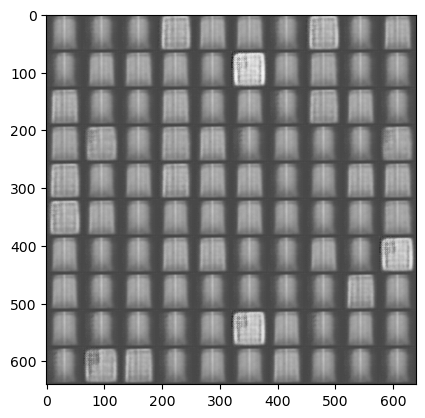

  0%|          | 0/75 [00:00<?, ?it/s]

epoch:   7  loss   0.0874 recon  0.08700 mmd  0.00042
epoch:   7  loss   0.0852 recon  0.08413 mmd  0.00107
epoch:   7  loss   0.0835 recon  0.08266 mmd  0.00087
epoch:   7  loss   0.0889 recon  0.08798 mmd  0.00087


  0%|          | 0/75 [00:00<?, ?it/s]

epoch:   8  loss   0.0860 recon  0.08446 mmd  0.00153
epoch:   8  loss   0.0862 recon  0.08528 mmd  0.00091
epoch:   8  loss   0.0850 recon  0.08298 mmd  0.00201
epoch:   8  loss   0.0846 recon  0.08366 mmd  0.00095


  0%|          | 0/75 [00:00<?, ?it/s]

epoch:   9  loss   0.0829 recon  0.08211 mmd  0.00082
epoch:   9  loss   0.0857 recon  0.08496 mmd  0.00072
epoch:   9  loss   0.0801 recon  0.07972 mmd  0.00038
epoch:   9  loss   0.0832 recon  0.08249 mmd  0.00076


  0%|          | 0/20 [00:00<?, ?it/s]

Validation loss: 0.08183 (ideal:  0.08420)


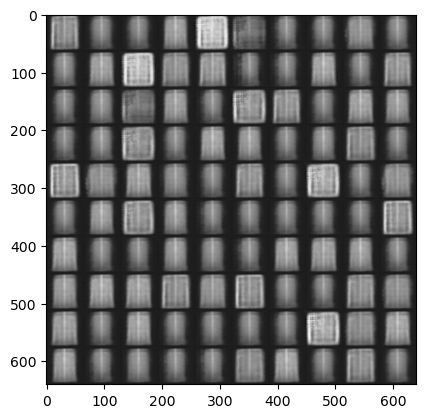

  0%|          | 0/75 [00:00<?, ?it/s]

epoch:  10  loss   0.0804 recon  0.07996 mmd  0.00043
epoch:  10  loss   0.0857 recon  0.08542 mmd  0.00033
epoch:  10  loss   0.0818 recon  0.08148 mmd  0.00032
epoch:  10  loss   0.0817 recon  0.08060 mmd  0.00113


  0%|          | 0/75 [00:00<?, ?it/s]

epoch:  11  loss   0.0828 recon  0.08175 mmd  0.00107
epoch:  11  loss   0.0858 recon  0.08523 mmd  0.00053
epoch:  11  loss   0.0870 recon  0.08556 mmd  0.00145
epoch:  11  loss   0.0848 recon  0.08387 mmd  0.00091


  0%|          | 0/75 [00:00<?, ?it/s]

epoch:  12  loss   0.0830 recon  0.08208 mmd  0.00096
epoch:  12  loss   0.0858 recon  0.08492 mmd  0.00089
epoch:  12  loss   0.0855 recon  0.08439 mmd  0.00111
epoch:  12  loss   0.0842 recon  0.08373 mmd  0.00047


  0%|          | 0/20 [00:00<?, ?it/s]

Validation loss: 0.08124 (ideal:  0.08297)


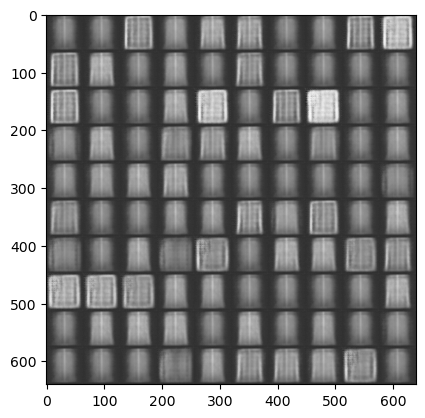

  0%|          | 0/75 [00:00<?, ?it/s]

epoch:  13  loss   0.0812 recon  0.08073 mmd  0.00049
epoch:  13  loss   0.0845 recon  0.08413 mmd  0.00034
epoch:  13  loss   0.0850 recon  0.08343 mmd  0.00153
epoch:  13  loss   0.0834 recon  0.08291 mmd  0.00052


  0%|          | 0/75 [00:00<?, ?it/s]

epoch:  14  loss   0.0816 recon  0.08112 mmd  0.00046
epoch:  14  loss   0.0850 recon  0.08455 mmd  0.00046
epoch:  14  loss   0.0840 recon  0.08364 mmd  0.00034
epoch:  14  loss   0.0820 recon  0.08146 mmd  0.00055


  0%|          | 0/75 [00:00<?, ?it/s]

epoch:  15  loss   0.0795 recon  0.07904 mmd  0.00048
epoch:  15  loss   0.0805 recon  0.08000 mmd  0.00052
epoch:  15  loss   0.0837 recon  0.08260 mmd  0.00110
epoch:  15  loss   0.0821 recon  0.07985 mmd  0.00224


  0%|          | 0/20 [00:00<?, ?it/s]

Validation loss: 0.07999 (ideal:  0.08175)


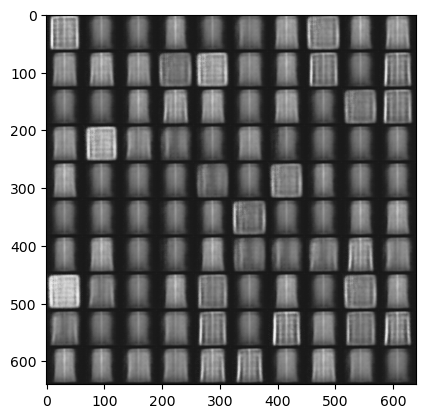

  0%|          | 0/75 [00:00<?, ?it/s]

epoch:  16  loss   0.0823 recon  0.08142 mmd  0.00087
epoch:  16  loss   0.0808 recon  0.08039 mmd  0.00037
epoch:  16  loss   0.0848 recon  0.08392 mmd  0.00092
epoch:  16  loss   0.0837 recon  0.08337 mmd  0.00034


  0%|          | 0/75 [00:00<?, ?it/s]

epoch:  17  loss   0.0788 recon  0.07782 mmd  0.00103
epoch:  17  loss   0.0808 recon  0.08033 mmd  0.00047
epoch:  17  loss   0.0803 recon  0.08015 mmd  0.00018
epoch:  17  loss   0.0803 recon  0.07954 mmd  0.00080


  0%|          | 0/75 [00:00<?, ?it/s]

epoch:  18  loss   0.0816 recon  0.08073 mmd  0.00087
epoch:  18  loss   0.0794 recon  0.07891 mmd  0.00047
epoch:  18  loss   0.0819 recon  0.08148 mmd  0.00044
Shape history:
0 initial: (1, 64, 64) = 4096
1 Conv2d: (16, 32, 32) = 16384
2 Conv2d: (32, 16, 16) = 8192
3 Conv2d: (128, 8, 8) = 8192
4 Conv2d: (128, 4, 4) = 2048
5 Conv2d: (128, 2, 2) = 512
6 Flatten: (512, 1, 1) = 512
7 Linear: (512, 1, 1) = 512
8 Linear: (128, 1, 1) = 128
9 Linear: (32, 1, 1) = 32
10 Linear: (8, 1, 1) = 8
11 Linear: (3, 1, 1) = 3
12 Linear: (8, 1, 1) = 8
13 Linear: (32, 1, 1) = 32
14 Linear: (128, 1, 1) = 128
15 Linear: (512, 1, 1) = 512
16 Linear: (512, 1, 1) = 512
17 reshape: (128, 2, 2) = 512
18 ConvTranspose2d: (128, 4, 4) = 2048
19 ConvTranspose2d: (128, 8, 8) = 8192
20 ConvTranspose2d: (32, 16, 16) = 8192
21 ConvTranspose2d: (16, 32, 32) = 16384
22 ConvTranspose2d: (16, 64, 64) = 65536
23 Conv2d: (1, 64, 64) = 4096


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

epoch:   0  loss   0.3241 recon  0.28229 mmd  0.04179
epoch:   0  loss   0.1185 recon  0.08992 mmd  0.02854
epoch:   0  loss   0.1040 recon  0.08476 mmd  0.01926
epoch:   0  loss   0.1045 recon  0.09081 mmd  0.01372


  0%|          | 0/20 [00:00<?, ?it/s]

Validation loss: 0.08893 (ideal:  0.08787)


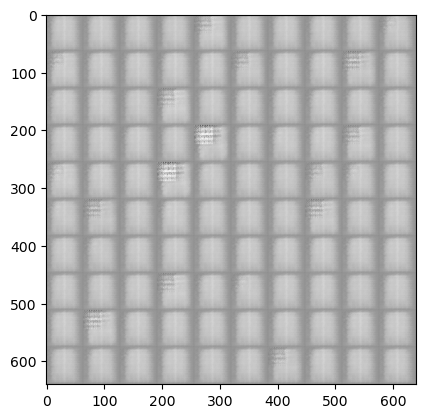

  0%|          | 0/75 [00:00<?, ?it/s]

epoch:   1  loss   0.1019 recon  0.08980 mmd  0.01208
epoch:   1  loss   0.1057 recon  0.09097 mmd  0.01475
epoch:   1  loss   0.1074 recon  0.08800 mmd  0.01941
epoch:   1  loss   0.0991 recon  0.08825 mmd  0.01085


  0%|          | 0/75 [00:00<?, ?it/s]

epoch:   2  loss   0.1012 recon  0.08632 mmd  0.01487
epoch:   2  loss   0.0993 recon  0.08737 mmd  0.01189
epoch:   2  loss   0.0916 recon  0.08598 mmd  0.00561
epoch:   2  loss   0.0962 recon  0.09114 mmd  0.00505


  0%|          | 0/75 [00:00<?, ?it/s]

epoch:   3  loss   0.0940 recon  0.08868 mmd  0.00530
epoch:   3  loss   0.0880 recon  0.08572 mmd  0.00232
epoch:   3  loss   0.0878 recon  0.08654 mmd  0.00123
epoch:   3  loss   0.0860 recon  0.08445 mmd  0.00157


  0%|          | 0/20 [00:00<?, ?it/s]

Validation loss: 0.08664 (ideal:  0.08665)


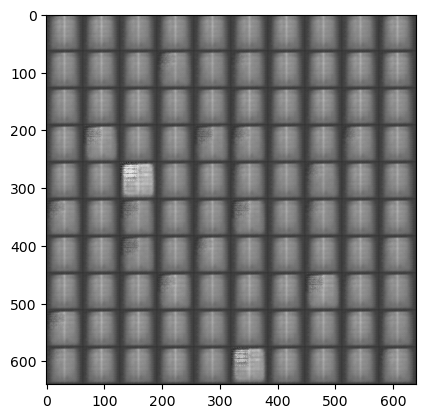

  0%|          | 0/75 [00:00<?, ?it/s]

epoch:   4  loss   0.0898 recon  0.08354 mmd  0.00626
epoch:   4  loss   0.0910 recon  0.08724 mmd  0.00380
epoch:   4  loss   0.0918 recon  0.09057 mmd  0.00127
epoch:   4  loss   0.0929 recon  0.08926 mmd  0.00365


  0%|          | 0/75 [00:00<?, ?it/s]

epoch:   5  loss   0.0918 recon  0.08774 mmd  0.00406
epoch:   5  loss   0.0884 recon  0.08767 mmd  0.00072
epoch:   5  loss   0.0895 recon  0.08900 mmd  0.00053
epoch:   5  loss   0.0923 recon  0.09022 mmd  0.00205


  0%|          | 0/75 [00:00<?, ?it/s]

epoch:   6  loss   0.0978 recon  0.09281 mmd  0.00501
epoch:   6  loss   0.0938 recon  0.09229 mmd  0.00147
epoch:   6  loss   0.0883 recon  0.08631 mmd  0.00194
epoch:   6  loss   0.0896 recon  0.08530 mmd  0.00427


  0%|          | 0/20 [00:00<?, ?it/s]

Validation loss: 0.08653 (ideal:  0.08542)


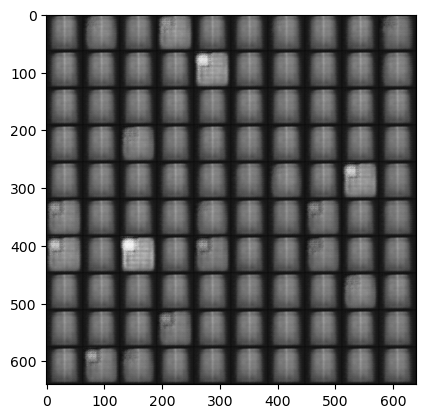

  0%|          | 0/75 [00:00<?, ?it/s]

epoch:   7  loss   0.0922 recon  0.09017 mmd  0.00205
epoch:   7  loss   0.0899 recon  0.08899 mmd  0.00090
epoch:   7  loss   0.0893 recon  0.08857 mmd  0.00069
epoch:   7  loss   0.0887 recon  0.08650 mmd  0.00225


  0%|          | 0/75 [00:00<?, ?it/s]

epoch:   8  loss   0.0872 recon  0.08646 mmd  0.00076
epoch:   8  loss   0.0887 recon  0.08719 mmd  0.00154
epoch:   8  loss   0.0834 recon  0.08219 mmd  0.00121
epoch:   8  loss   0.0912 recon  0.08998 mmd  0.00126


  0%|          | 0/75 [00:00<?, ?it/s]

epoch:   9  loss   0.0890 recon  0.08856 mmd  0.00039
epoch:   9  loss   0.0869 recon  0.08473 mmd  0.00220
epoch:   9  loss   0.0867 recon  0.08500 mmd  0.00173
epoch:   9  loss   0.0888 recon  0.08804 mmd  0.00079


  0%|          | 0/20 [00:00<?, ?it/s]

Validation loss: 0.08582 (ideal:  0.08420)


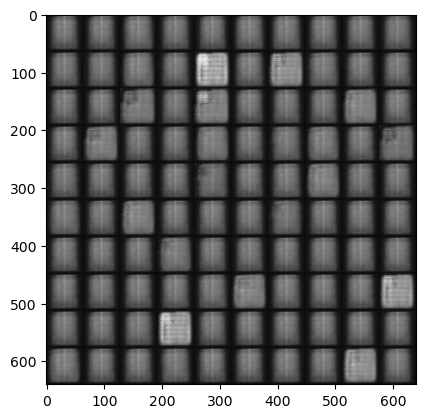

  0%|          | 0/75 [00:00<?, ?it/s]

epoch:  10  loss   0.0886 recon  0.08640 mmd  0.00224
epoch:  10  loss   0.0844 recon  0.08199 mmd  0.00243
epoch:  10  loss   0.0883 recon  0.08714 mmd  0.00117
epoch:  10  loss   0.0877 recon  0.08663 mmd  0.00106


  0%|          | 0/75 [00:00<?, ?it/s]

epoch:  11  loss   0.0905 recon  0.08907 mmd  0.00144
epoch:  11  loss   0.0876 recon  0.08677 mmd  0.00086
epoch:  11  loss   0.0854 recon  0.08401 mmd  0.00138
epoch:  11  loss   0.0864 recon  0.08563 mmd  0.00079


  0%|          | 0/75 [00:00<?, ?it/s]

epoch:  12  loss   0.0906 recon  0.08917 mmd  0.00146
epoch:  12  loss   0.0872 recon  0.08529 mmd  0.00186
epoch:  12  loss   0.0870 recon  0.08517 mmd  0.00184
epoch:  12  loss   0.0872 recon  0.08495 mmd  0.00229


  0%|          | 0/20 [00:00<?, ?it/s]

Validation loss: 0.08518 (ideal:  0.08297)


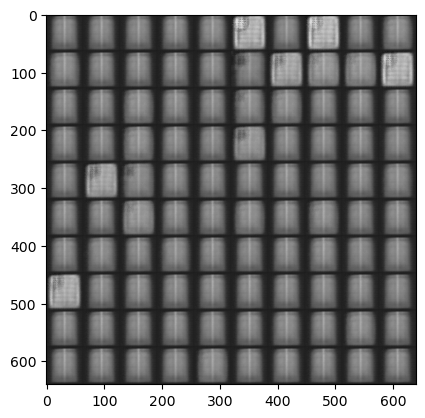

  0%|          | 0/75 [00:00<?, ?it/s]

epoch:  13  loss   0.0856 recon  0.08496 mmd  0.00061
epoch:  13  loss   0.0878 recon  0.08694 mmd  0.00089
epoch:  13  loss   0.0845 recon  0.08366 mmd  0.00081
epoch:  13  loss   0.0859 recon  0.08455 mmd  0.00132


  0%|          | 0/75 [00:00<?, ?it/s]

epoch:  14  loss   0.0874 recon  0.08673 mmd  0.00070
epoch:  14  loss   0.0862 recon  0.08518 mmd  0.00102
epoch:  14  loss   0.0860 recon  0.08550 mmd  0.00054
epoch:  14  loss   0.0893 recon  0.08653 mmd  0.00277


  0%|          | 0/75 [00:00<?, ?it/s]

epoch:  15  loss   0.0846 recon  0.08430 mmd  0.00033
epoch:  15  loss   0.0872 recon  0.08639 mmd  0.00082
epoch:  15  loss   0.0855 recon  0.08431 mmd  0.00117
epoch:  15  loss   0.0880 recon  0.08765 mmd  0.00038


  0%|          | 0/20 [00:00<?, ?it/s]

Validation loss: 0.08445 (ideal:  0.08175)


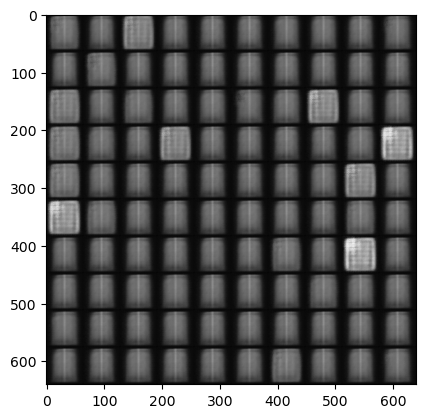

  0%|          | 0/75 [00:00<?, ?it/s]

epoch:  16  loss   0.0871 recon  0.08560 mmd  0.00149
epoch:  16  loss   0.0852 recon  0.08464 mmd  0.00061
epoch:  16  loss   0.0869 recon  0.08582 mmd  0.00107
epoch:  16  loss   0.0857 recon  0.08473 mmd  0.00101


  0%|          | 0/75 [00:00<?, ?it/s]

epoch:  17  loss   0.0857 recon  0.08412 mmd  0.00155
epoch:  17  loss   0.0889 recon  0.08737 mmd  0.00148
epoch:  17  loss   0.0905 recon  0.08930 mmd  0.00125
epoch:  17  loss   0.0829 recon  0.08271 mmd  0.00023


  0%|          | 0/75 [00:00<?, ?it/s]

epoch:  18  loss   0.0862 recon  0.08524 mmd  0.00101
epoch:  18  loss   0.0834 recon  0.08273 mmd  0.00065
epoch:  18  loss   0.0851 recon  0.08365 mmd  0.00141
epoch:  18  loss   0.0863 recon  0.08431 mmd  0.00199


  0%|          | 0/20 [00:00<?, ?it/s]

Validation loss: 0.08367 (ideal:  0.08053)


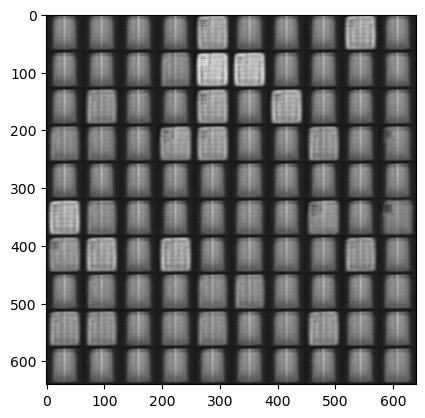

  0%|          | 0/75 [00:00<?, ?it/s]

epoch:  19  loss   0.0830 recon  0.08266 mmd  0.00032
epoch:  19  loss   0.0859 recon  0.08554 mmd  0.00037
epoch:  19  loss   0.0844 recon  0.08329 mmd  0.00109
epoch:  19  loss   0.0809 recon  0.08039 mmd  0.00049


  0%|          | 0/75 [00:00<?, ?it/s]

epoch:  20  loss   0.0864 recon  0.08591 mmd  0.00049
epoch:  20  loss   0.0857 recon  0.08509 mmd  0.00061
epoch:  20  loss   0.0838 recon  0.08319 mmd  0.00057
epoch:  20  loss   0.0820 recon  0.08129 mmd  0.00070


  0%|          | 0/75 [00:00<?, ?it/s]

epoch:  21  loss   0.0862 recon  0.08465 mmd  0.00154
epoch:  21  loss   0.0851 recon  0.08328 mmd  0.00177
epoch:  21  loss   0.0845 recon  0.08413 mmd  0.00036
epoch:  21  loss   0.0846 recon  0.08441 mmd  0.00020


  0%|          | 0/20 [00:00<?, ?it/s]

Validation loss: 0.08303 (ideal:  0.07930)


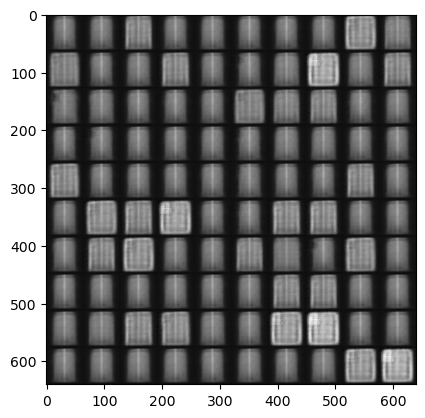

  0%|          | 0/75 [00:00<?, ?it/s]

epoch:  22  loss   0.0836 recon  0.08310 mmd  0.00051
epoch:  22  loss   0.0893 recon  0.08846 mmd  0.00087
epoch:  22  loss   0.0842 recon  0.08400 mmd  0.00025
epoch:  22  loss   0.0834 recon  0.08290 mmd  0.00049


  0%|          | 0/75 [00:00<?, ?it/s]

epoch:  23  loss   0.0835 recon  0.08233 mmd  0.00115
epoch:  23  loss   0.0849 recon  0.08390 mmd  0.00098
epoch:  23  loss   0.0849 recon  0.08371 mmd  0.00115
epoch:  23  loss   0.0823 recon  0.08127 mmd  0.00105


  0%|          | 0/75 [00:00<?, ?it/s]

epoch:  24  loss   0.0851 recon  0.08344 mmd  0.00168
epoch:  24  loss   0.0821 recon  0.08137 mmd  0.00075
epoch:  24  loss   0.0851 recon  0.08402 mmd  0.00113
epoch:  24  loss   0.0827 recon  0.08204 mmd  0.00062


  0%|          | 0/20 [00:00<?, ?it/s]

Validation loss: 0.08221 (ideal:  0.07808)


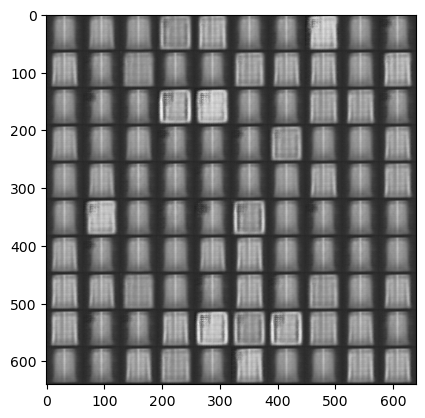

  0%|          | 0/75 [00:00<?, ?it/s]

epoch:  25  loss   0.0888 recon  0.08835 mmd  0.00046
epoch:  25  loss   0.0846 recon  0.08403 mmd  0.00057
epoch:  25  loss   0.0836 recon  0.08313 mmd  0.00045
epoch:  25  loss   0.0870 recon  0.08561 mmd  0.00141


  0%|          | 0/75 [00:00<?, ?it/s]

epoch:  26  loss   0.0812 recon  0.08069 mmd  0.00054
epoch:  26  loss   0.0835 recon  0.08286 mmd  0.00060
epoch:  26  loss   0.0842 recon  0.08350 mmd  0.00065
epoch:  26  loss   0.0862 recon  0.08536 mmd  0.00084


  0%|          | 0/75 [00:00<?, ?it/s]

epoch:  27  loss   0.0806 recon  0.08014 mmd  0.00042
epoch:  27  loss   0.0817 recon  0.08133 mmd  0.00034
epoch:  27  loss   0.0807 recon  0.07997 mmd  0.00075
epoch:  27  loss   0.0814 recon  0.08082 mmd  0.00058


  0%|          | 0/20 [00:00<?, ?it/s]

Validation loss: 0.08138 (ideal:  0.07685)


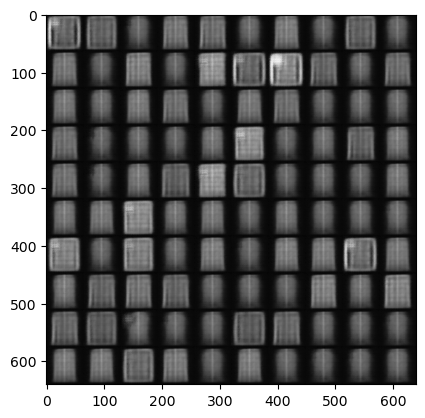

  0%|          | 0/75 [00:00<?, ?it/s]

epoch:  28  loss   0.0892 recon  0.08891 mmd  0.00031
epoch:  28  loss   0.0791 recon  0.07821 mmd  0.00085
epoch:  28  loss   0.0850 recon  0.08467 mmd  0.00031
epoch:  28  loss   0.0826 recon  0.08186 mmd  0.00071


  0%|          | 0/75 [00:00<?, ?it/s]

epoch:  29  loss   0.0826 recon  0.08215 mmd  0.00045
epoch:  29  loss   0.0831 recon  0.08180 mmd  0.00133
epoch:  29  loss   0.0826 recon  0.08108 mmd  0.00155
epoch:  29  loss   0.0838 recon  0.08239 mmd  0.00136


  0%|          | 0/75 [00:00<?, ?it/s]

epoch:  30  loss   0.0806 recon  0.07901 mmd  0.00157
epoch:  30  loss   0.0818 recon  0.08126 mmd  0.00050
epoch:  30  loss   0.0821 recon  0.08152 mmd  0.00062
epoch:  30  loss   0.0848 recon  0.08419 mmd  0.00061


  0%|          | 0/20 [00:00<?, ?it/s]

Validation loss: 0.08032 (ideal:  0.07563)


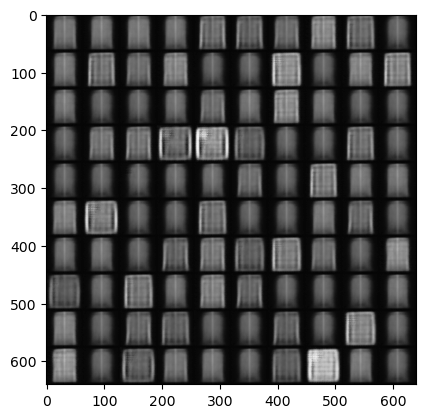

  0%|          | 0/75 [00:00<?, ?it/s]

epoch:  31  loss   0.0797 recon  0.07924 mmd  0.00041
epoch:  31  loss   0.0811 recon  0.08009 mmd  0.00098
epoch:  31  loss   0.0820 recon  0.08150 mmd  0.00049
epoch:  31  loss   0.0842 recon  0.08353 mmd  0.00067


  0%|          | 0/75 [00:00<?, ?it/s]

epoch:  32  loss   0.0826 recon  0.08120 mmd  0.00140
epoch:  32  loss   0.0785 recon  0.07787 mmd  0.00059
epoch:  32  loss   0.0832 recon  0.08232 mmd  0.00090
epoch:  32  loss   0.0754 recon  0.07494 mmd  0.00051


  0%|          | 0/75 [00:00<?, ?it/s]

epoch:  33  loss   0.0822 recon  0.08107 mmd  0.00109
epoch:  33  loss   0.0819 recon  0.08085 mmd  0.00108
epoch:  33  loss   0.0837 recon  0.08245 mmd  0.00129
epoch:  33  loss   0.0800 recon  0.07973 mmd  0.00029


  0%|          | 0/20 [00:00<?, ?it/s]

Validation loss: 0.07968 (ideal:  0.07440)


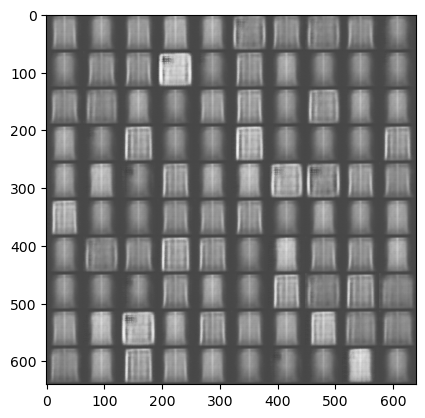

  0%|          | 0/75 [00:00<?, ?it/s]

epoch:  34  loss   0.0811 recon  0.08042 mmd  0.00064
epoch:  34  loss   0.0836 recon  0.08121 mmd  0.00238
epoch:  34  loss   0.0812 recon  0.08037 mmd  0.00087
epoch:  34  loss   0.0820 recon  0.08143 mmd  0.00055


  0%|          | 0/75 [00:00<?, ?it/s]

epoch:  35  loss   0.0840 recon  0.08355 mmd  0.00047
epoch:  35  loss   0.0840 recon  0.08278 mmd  0.00120
epoch:  35  loss   0.0818 recon  0.08060 mmd  0.00116
epoch:  35  loss   0.0793 recon  0.07912 mmd  0.00019


  0%|          | 0/75 [00:00<?, ?it/s]

epoch:  36  loss   0.0823 recon  0.08207 mmd  0.00024
epoch:  36  loss   0.0807 recon  0.07979 mmd  0.00091
epoch:  36  loss   0.0800 recon  0.07946 mmd  0.00053
epoch:  36  loss   0.0781 recon  0.07682 mmd  0.00129


  0%|          | 0/20 [00:00<?, ?it/s]

Validation loss: 0.07915 (ideal:  0.07318)


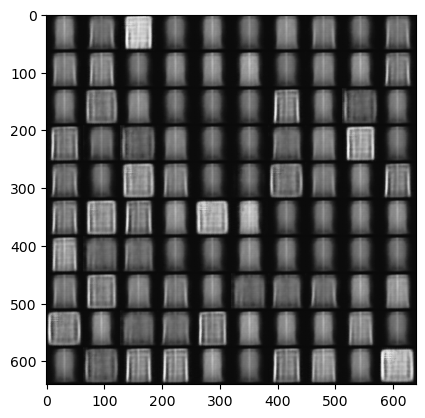

  0%|          | 0/75 [00:00<?, ?it/s]

epoch:  37  loss   0.0824 recon  0.08129 mmd  0.00109
epoch:  37  loss   0.0795 recon  0.07917 mmd  0.00037
epoch:  37  loss   0.0806 recon  0.07981 mmd  0.00082
epoch:  37  loss   0.0816 recon  0.08073 mmd  0.00090


  0%|          | 0/75 [00:00<?, ?it/s]

epoch:  38  loss   0.0837 recon  0.08282 mmd  0.00090
epoch:  38  loss   0.0816 recon  0.08122 mmd  0.00039
epoch:  38  loss   0.0823 recon  0.08090 mmd  0.00142
epoch:  38  loss   0.0830 recon  0.08062 mmd  0.00241


  0%|          | 0/75 [00:00<?, ?it/s]

epoch:  39  loss   0.0812 recon  0.07978 mmd  0.00145
epoch:  39  loss   0.0819 recon  0.08161 mmd  0.00031
epoch:  39  loss   0.0802 recon  0.07931 mmd  0.00093
epoch:  39  loss   0.0810 recon  0.07879 mmd  0.00220


  0%|          | 0/20 [00:00<?, ?it/s]

Validation loss: 0.07864 (ideal:  0.07195)


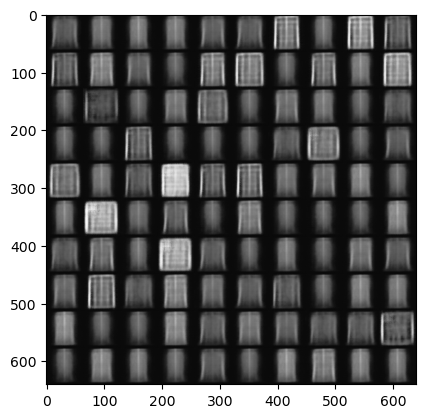

  0%|          | 0/75 [00:00<?, ?it/s]

epoch:  40  loss   0.0791 recon  0.07868 mmd  0.00046
epoch:  40  loss   0.0804 recon  0.07960 mmd  0.00081
epoch:  40  loss   0.0794 recon  0.07859 mmd  0.00079
epoch:  40  loss   0.0814 recon  0.07905 mmd  0.00234


  0%|          | 0/75 [00:00<?, ?it/s]

epoch:  41  loss   0.0812 recon  0.08077 mmd  0.00047
epoch:  41  loss   0.0818 recon  0.08134 mmd  0.00051
epoch:  41  loss   0.0810 recon  0.08044 mmd  0.00055
epoch:  41  loss   0.0806 recon  0.07989 mmd  0.00072


  0%|          | 0/75 [00:00<?, ?it/s]

epoch:  42  loss   0.0793 recon  0.07803 mmd  0.00131
epoch:  42  loss   0.0813 recon  0.08052 mmd  0.00077
epoch:  42  loss   0.0807 recon  0.08005 mmd  0.00066
epoch:  42  loss   0.0819 recon  0.08051 mmd  0.00141


  0%|          | 0/20 [00:00<?, ?it/s]

Validation loss: 0.07811 (ideal:  0.07073)


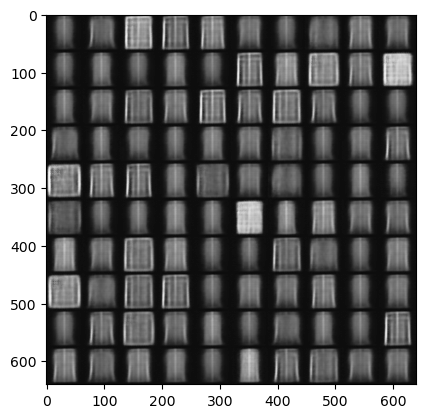

  0%|          | 0/75 [00:00<?, ?it/s]

epoch:  43  loss   0.0811 recon  0.08033 mmd  0.00082
epoch:  43  loss   0.0792 recon  0.07857 mmd  0.00067
epoch:  43  loss   0.0836 recon  0.08112 mmd  0.00249
epoch:  43  loss   0.0799 recon  0.07902 mmd  0.00086


  0%|          | 0/75 [00:00<?, ?it/s]

epoch:  44  loss   0.0779 recon  0.07755 mmd  0.00034
epoch:  44  loss   0.0816 recon  0.08099 mmd  0.00062
epoch:  44  loss   0.0779 recon  0.07706 mmd  0.00087
epoch:  44  loss   0.0794 recon  0.07913 mmd  0.00030


  0%|          | 0/75 [00:00<?, ?it/s]

epoch:  45  loss   0.0799 recon  0.07966 mmd  0.00022
epoch:  45  loss   0.0798 recon  0.07942 mmd  0.00041
epoch:  45  loss   0.0805 recon  0.08008 mmd  0.00039
epoch:  45  loss   0.0774 recon  0.07700 mmd  0.00040


  0%|          | 0/20 [00:00<?, ?it/s]

Validation loss: 0.07796 (ideal:  0.06950)


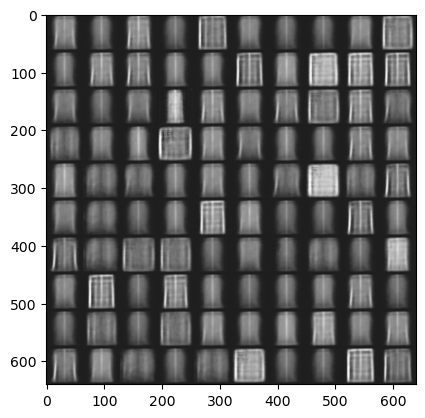

  0%|          | 0/75 [00:00<?, ?it/s]

epoch:  46  loss   0.0797 recon  0.07849 mmd  0.00123
epoch:  46  loss   0.0792 recon  0.07865 mmd  0.00051
epoch:  46  loss   0.0783 recon  0.07756 mmd  0.00070
epoch:  46  loss   0.0800 recon  0.07941 mmd  0.00056


  0%|          | 0/75 [00:00<?, ?it/s]

epoch:  47  loss   0.0783 recon  0.07811 mmd  0.00019
epoch:  47  loss   0.0827 recon  0.08251 mmd  0.00014
epoch:  47  loss   0.0819 recon  0.08152 mmd  0.00033
epoch:  47  loss   0.0815 recon  0.07844 mmd  0.00309


  0%|          | 0/75 [00:00<?, ?it/s]

epoch:  48  loss   0.0799 recon  0.07919 mmd  0.00068
epoch:  48  loss   0.0793 recon  0.07838 mmd  0.00091
epoch:  48  loss   0.0832 recon  0.08201 mmd  0.00116
epoch:  48  loss   0.0782 recon  0.07802 mmd  0.00015


  0%|          | 0/20 [00:00<?, ?it/s]

Validation loss: 0.07787 (ideal:  0.06828)


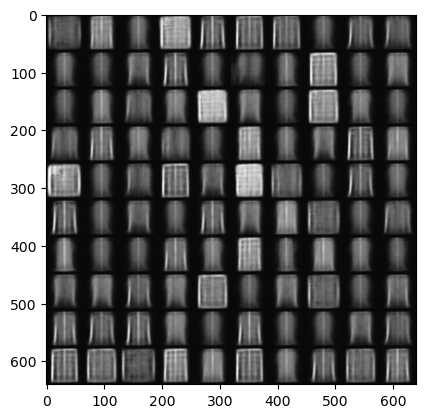

  0%|          | 0/75 [00:00<?, ?it/s]

epoch:  49  loss   0.0804 recon  0.07920 mmd  0.00123
epoch:  49  loss   0.0808 recon  0.08028 mmd  0.00055
epoch:  49  loss   0.0785 recon  0.07843 mmd  0.00010
epoch:  49  loss   0.0820 recon  0.08033 mmd  0.00166


In [4]:

%matplotlib inline
z_dim = 3
torch.autograd.set_detect_anomaly(False)

def train():
    # progress = trange(config.get("epochs"))
    epochs = 50
    progress = trange(epochs)
    # model.set_randn(config.get("epochs") * len(train_loader), config.get("train_batch_size"), device=device)
    model.set_randn(epochs * len(train_loader), config.get("train_batch_size"), device=device)
    log_freq = int(len(train_loader) * 0.3)

    for epoch in progress:
        # progress.write(f"z_var: {model.z_var}")

        for batch_idx, (train_x, _) in tqdm(enumerate(train_loader), total=len(train_loader)):
            train_x = train_x.to(device)

            optimizer.zero_grad()

            output = model(train_x, training=(batch_idx != len(train_loader) - 1))
            loss = model.loss_function(*output)
            if isnan(loss["loss"].data.item()) or loss["loss"].data.item() > 0.9:
                # raise ValueError("Loss is NaN or too large")
                return float("nan")
            loss["loss"].backward()

            optimizer.step()

            if batch_idx % log_freq == 0:
                loss_v = loss["loss"].data.item()
                if isnan(loss_v):
                    torch.autograd.set_detect_anomaly(True)
                    continue
                progress.write(
                    f'epoch: {epoch: ^5}loss {loss["loss"].data.item(): 8.4f} recon {loss["Reconstruction_Loss"].data.item(): 8.5f} mmd {loss["MMD"].data.item(): 8.5f}'
                )

            del loss["loss"]

        if epoch % 3 == 0:
            avg_loss = 0
            with torch.no_grad():
                for batch_idx, (valid_x, _) in tqdm(
                    enumerate(valid_loader), total=len(valid_loader)
                ):
                    valid_x = valid_x.to(device)

                    output = model(valid_x, training=False)
                    loss = model.loss_function(*output)
                    avg_loss += loss["Reconstruction_Loss"].data.item()

                    del loss["loss"]
                
                avg_loss /= len(valid_loader)
                progress.write(f"Validation loss: {avg_loss:.5f} (ideal: {epoch * -4.0826111111111e-4 + 0.08787407: 8.5f})")

            show_samples_in_grid(model.sample(100, device_name), IMG_SIDE_LENGTH)

        # model.z_var *= 0.99

    return avg_loss

res = train()
while isnan(res):
    model = setup()
    optimizer = optim.Adam(
        model.parameters(),
        lr=config.get("learning_rate"),
        weight_decay=config.get("weight_decay"),
    )
    res = train()


Epoch 9終了時の各モデルのrecon loss

- 4-8-16-32-64: 08?
- 8-16-32-64-64: 0776
- 8-32-128: 0785(unstable)
- 16-64-128: 0773
- 32-64-128: 0790
- 16-32-128: 0774
- 8-16-128: 0789
- 16-32-256: 0797(unstable)
- 16-64-256: 0779(unstable)
- 16-16-128: 0781
- 32-64-256: 0786
- 16-32-64: 0778
- 8-16-64: 0780
- 8-16-64-128: 0775
- 16-16-64-128: 0778
- 4-16-64-128: 0779
- 16-32-64-128: 0772
- 16-32-64-256: 0777
- 16-32-128-256: 0769
- 16-32-128-512: 0771
- 16-32-128-128: 0767
- 16-32-128-64: 0768
- 16-32-128-32: 0773
- 16-64-128-128: 0774
- 16-32-128-128-128: 0752
- 16-32-128-128-256: 0767
- 16-32-128-128-128-128: 0752

batch size拡大について

- batch sizeとlrを等倍し、latent_varを1000にしたら、lossは0760相当
  - その後0755程度でサチった
- 0752まで下げられるようにlatent_varを調整したい
- latent varも同様に等倍したら戻った、最強．
  - なぜoptunaがこの値の周辺に反応しなかったのかは不明
- latent varとlossの変動が同程度であるのが良いようだ．
  - reconstruction lossの補助になっているという直感は間違ってなさそう
  - 15 epoch超えたあたりで半分になるようにスケジュールしてみる
    - やりすぎだったっぽいので0.99にした
    - train reconstruction lossがvalidation reconstruction lossと同程度になるように調節しよう
- loss減衰速度低下とサチュレーションの二通りがある
  - 減衰速度低下はlatent varが大きすぎる
  - サチュレーションはlatent varが小さすぎる
- その後しばらく実験を繰り返したところ、batch sizeを大きくするとmmdが下がりにくくなることがわかった
  - あとバリデーションスコアも悪くなる
  - mmdが下がらなくなるのと同根とみてよさそう
  - いや、lrを下げたことが原因だったかも

減衰率コントロール

- 0.99にしたらlossが0.0742程度でサチった
  - 確かepoch 10時点では0751ぐらい
- 0.955は0755程度
- 0.98は0762程度
- 1.5%減衰なら10epoch時に0752

batch size拡大(10 epoch)

- 20: 0756
- 40: 0758
- 60: 0752
- 80: 0760
- 100: 0760
- 120: 0764
- 140: 0764

どれも7th epochでは0765程度出るが、batch sizeが大きいとその後は下がらない
3倍〜4倍程度が良さそう

lrを探索したところ、10 epoch時点で0840がベスト、0850ぐらいがボリュームゾーンで、0870を超えるとかなりひどかった．

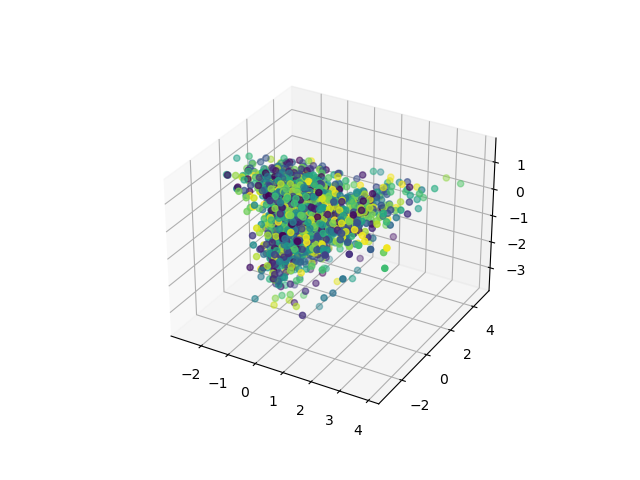

In [5]:
%matplotlib widget
z, label = generate_labelled_samples(model, test_loader)
scatter_3d(z, label)

In [6]:
#save(f"{config.get('hidden_dims')}.pth", model)

In [7]:
model.z_var

3.6866278135394097